Implementation of stochastic and batch grandient descent in python

We will use very simple home prices data set to implement batch and stochastic gradient descent in python. Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties. In stochastic GD, we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights. So the key difference here is that to adjust weights batch GD will use all training samples where as stochastic GD will use one randomly picked training sample

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
4,1200,2,51.00
12,1000,2,38.00
2,1440,3,62.00
5,1170,2,38.00
0,1056,2,39.07


Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scalling on them

In [5]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_Y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [6]:
scaled_Y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [7]:
def batch_gradient_descent(X,y_true,epochs,learning_rate = 0.01):
    numpy_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # out case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(numpy_of_features))
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w,X.T) + b
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) #  MSE (Mean Squared Error)
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

Check price equation above. In that equation we were trying to find values of w1,w2 and bias. Here we got these values for each of them,

w1 = 0.66469087 w2 = 0.60541671 bias = -0.17792104056392882

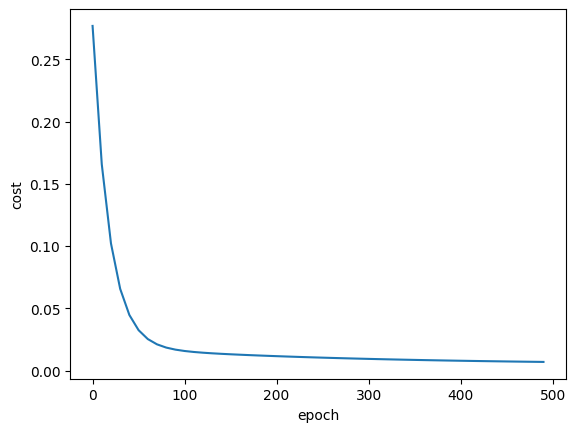

In [8]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [10]:
def predict(area, bedrooms, w,b):
    scaled_X = sx.transform([[area,bedrooms]])[0]
    # here w1 = w[0], w2 = w[1], w3[w2] and bias is b
    # equation for price is w1*area + w2*bedrooms +w*age + bias
    # scaled_X[0] is area
    # scaled_x[1] is bedrooms
    # scaled_x[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to do rescal it back to original value
    # also value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

C:\Users\emon1\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [11]:
predict(1000,2,w,b)

C:\Users\emon1\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

(2) Stochastic Gradient Descent Implementation

Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [13]:
# we will use random libary to pick random training sample
import random
random.randint(0,6) # randit gives random number betweeen two numbers speified in the argument

6

In [15]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate = 0.01):
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features, IN
    # our case number_of_features = 3(area,bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_sample = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0,total_sample-1) # ranodm index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w,sample_x.T) + b
        
        w_grad = -(2/total_sample)*(sample_x.T.dot(sample_y-y_predicted))
        b_gred = -(2/total_sample)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_gred
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration reocrd the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list,sgd = sgd(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),10000)
w_sgd,b_sgd,cost_sgd

NameError: name 'sgd' is not defined

NameError: name 'cost_list_sgd' is not defined

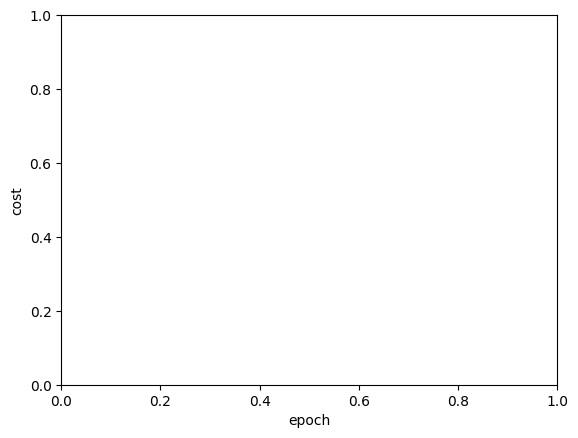

In [16]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list_sgd)

In [17]:
predict(26000,4,w_sgd,b_sgd)

NameError: name 'w_sgd' is not defined

In [18]:
predict(1000,2,w_sgd,b_sgd)

NameError: name 'w_sgd' is not defined

In [19]:
predict(1500,3,w_sgd,b_sgd)

NameError: name 'w_sgd' is not defined

Exercise

Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples)

Playgroup theke varsity ar Youtube theke udamy te porasuna er khatire onek teacher er class korci. tader oklanto poricrom er karone janar o sekhar sujog hoise. kintu ML er Neural Network er moto concept eto sundor vabe je bujano jay eta cilo amar kolponar bahire.jeta tin din e buji nai uni seta bujaice 19 minute e. amar satro jiboner sera class bodhoy etai.